## Experiment 1: 

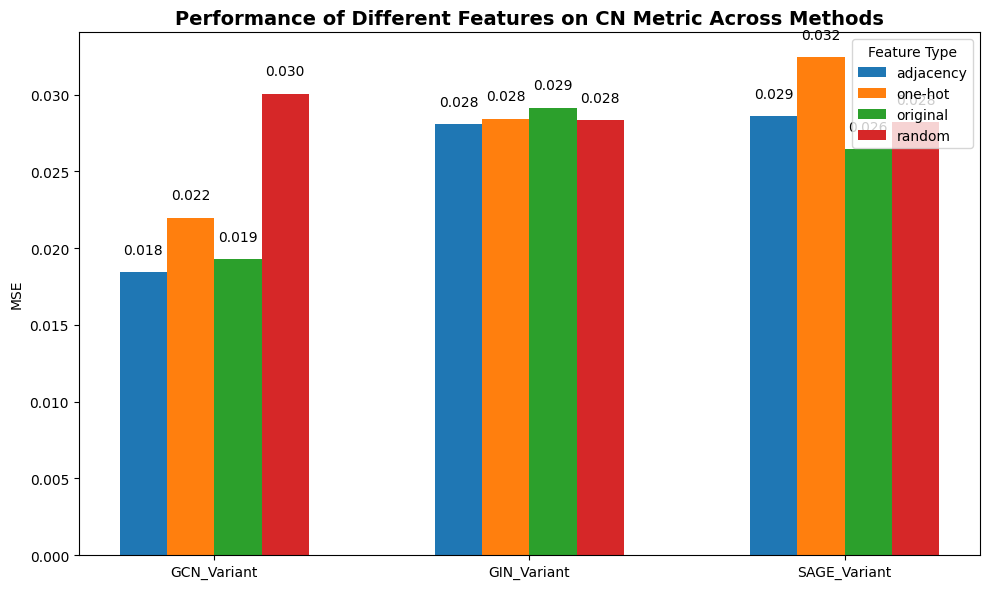

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Updated dataset with an additional "original" feature type for each method
data_values = [
    ["GCN_Variant", "random", "CN", 0.03005494363605976],
    ["GCN_Variant", "adjacency", "CN", 0.018450872972607613],
    ["GCN_Variant", "one-hot", "CN", 0.021978897973895073],
    ["GCN_Variant", "original", "CN", 0.019261559471488],
    ["GIN_Variant", "random", "CN", 0.02834874577820301],
    ["GIN_Variant", "adjacency", "CN", 0.028055662289261818],
    ["GIN_Variant", "one-hot", "CN", 0.028442438691854477],
    ["GIN_Variant", "original", "CN", 0.0291530042886734],
    ["SAGE_Variant", "random", "CN", 0.02822662889957428],
    ["SAGE_Variant", "adjacency", "CN", 0.02859743870794773],
    ["SAGE_Variant", "one-hot", "CN", 0.032437920570373535],
    ["SAGE_Variant", "original", "CN", 0.026430008932948112]
]

# Convert to DataFrame
df = pd.DataFrame(data_values, columns=["Method", "Feature", "Metric", "Value"])

# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df["Method"].unique()))  # x-axis positions for each method
width = 0.15  # Adjusted width for additional feature type

# Colors for each feature type
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot each feature's data for all methods grouped by method type
for i, (feature, group) in enumerate(df.groupby("Feature")):
    values = group["Value"].values
    ax.bar(x + i * width, values, width, label=feature, color=colors[i])

    # Adding data labels with all errors set to zero
    for j, val in enumerate(values):
        ax.text(x[j] + i * width, val + 0.001, f'{val:.3f}', ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('MSE')
ax.set_title('Performance of Different Features on CN Metric Across Methods', loc='center', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(df["Method"].unique())
ax.legend(loc='upper right', title="Feature Type")

plt.tight_layout()
plt.show()
